### Elbow Criterion Method
<font color ='#00ccff'>
+) Sum of squared errors (SSE): Với mỗi k (thường từ 1->10) thì tính giá trị SSE tương ứng <br>
+) Khi tăng số lượng Clusters (cụm) lên thì sẽ giảm khoảng đến các data points 

<font color ='yellow'> 
-> vì thế mục tiêu là giá trị K nhỏ sao cho SSE thấp

### Silhouette Coefficient Method
<font color ='#00ccff'>
+) Sum of squared errors (SSE): Với mỗi k (thường từ 1->10) thì tính giá trị SSE tương ứng <br>
+) Khi tăng số lượng Clusters (cụm) lên thì sẽ giảm khoảng đến các data points 

<font color ='yellow'> 
-> vì thế mục tiêu là giá trị K nhỏ sao cho SSE thấp

https://www.kaggle.com/kushal1996/customer-segmentation-k-means-analysis

https://www.kaggle.com/vipulgandhi/kmeans-detailed-explanation/

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('../ML-Beginner/data/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


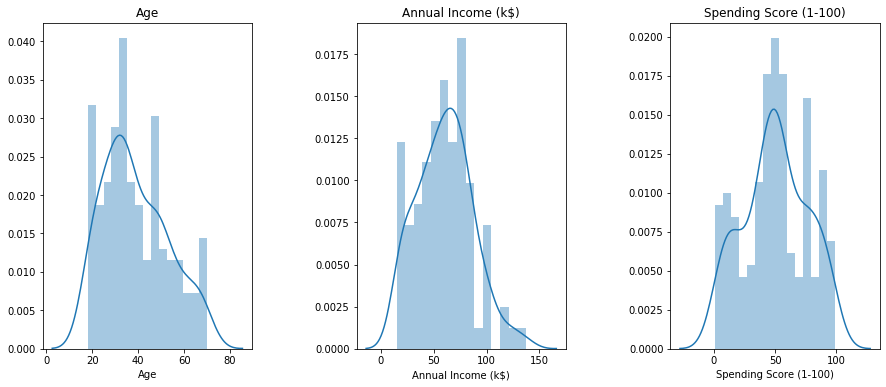

In [4]:
plt.figure(figsize=(15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(data[x], bins= 15)
    plt.title('{}'.format(x))
plt.show()

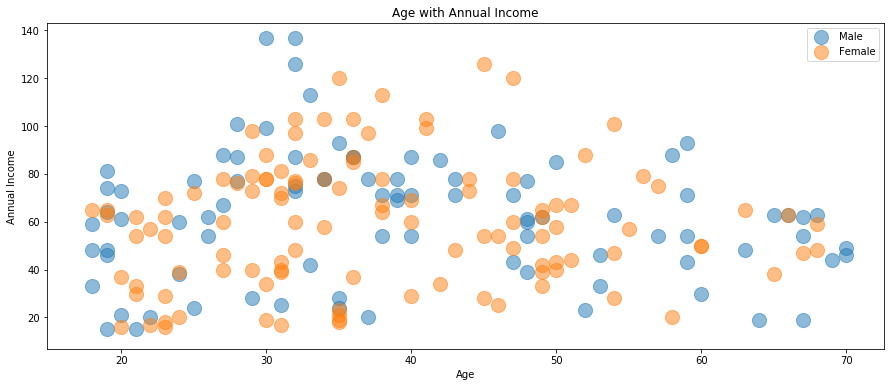

In [5]:
plt.figure(1, figsize=(15, 6))
for sex in ['Male', 'Female']:
    plt.scatter(x = 'Age', y = 'Annual Income (k$)', data = data[data['Gender'] == sex], s = 200, alpha= 0.5, label = sex)
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Age with Annual Income')
plt.legend()
plt.show()

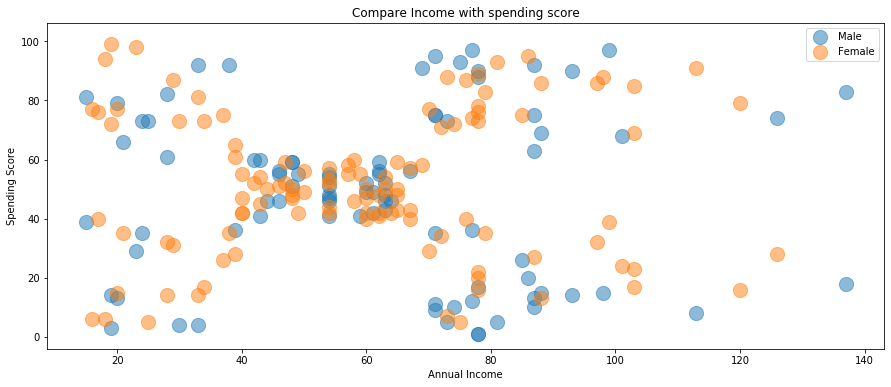

In [6]:
plt.figure(1, figsize=(15, 6))

for sex in ['Male', 'Female']:
    plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = data[data['Gender'] == sex], s = 200, alpha= 0.5, label = sex)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Compare Income with spending score')
plt.legend()
plt.show()

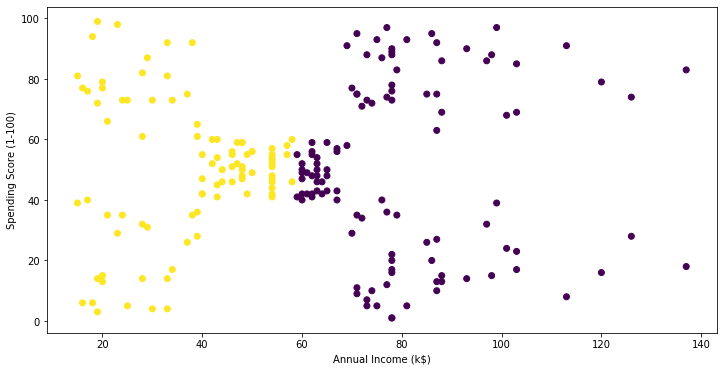

In [7]:

data1 = data.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(data1)
labels = kmeans.predict(data1)
plt.figure(figsize=(12, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c = labels)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.show()

### 1.Segmentation using Age and Spending Score

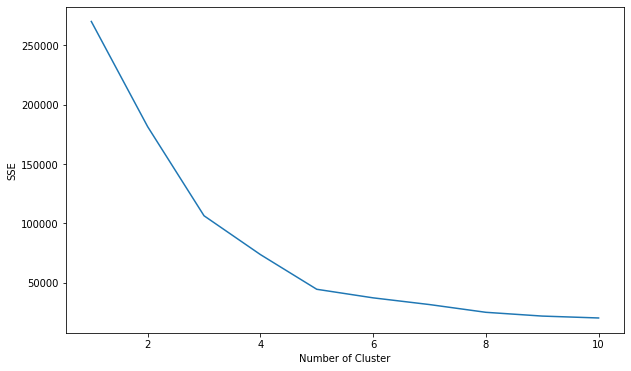

In [8]:
sse ={}
x = data.iloc[:, [3, 4]].values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter= 1000).fit(x)
    sse[k] = kmeans.inertia_
plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of Cluster')
plt.ylabel('SSE')
plt.show()

In [9]:
x = data[['Age', 'Spending Score (1-100)']].iloc[:, :].values
inertia = []

for i in range(1, 11):
    al = KMeans(n_clusters=i, max_iter= 300)
    al.fit(x)
    inertia.append(al.inertia_)

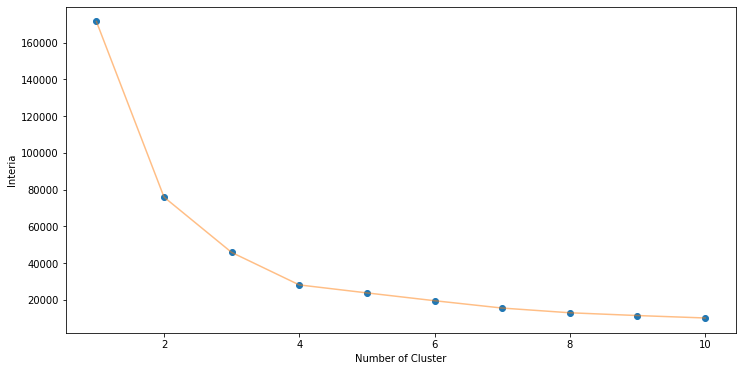

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Cluster')
plt.ylabel('Interia')
plt.show()

In [11]:
al = KMeans(n_clusters= 4, max_iter= 300)
al.fit(x)
labels1 = al.labels_
centroids1 = al.cluster_centers_

In [12]:
h = 0.02
x_min, x_max = x[:, 0].min() -1, x[:, 0].max() +1
y_min, y_max = x[:, 1].min() -1, x[:, 1].max() +1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
pred = al.predict(np.c_[xx.ravel(), yy.ravel()])

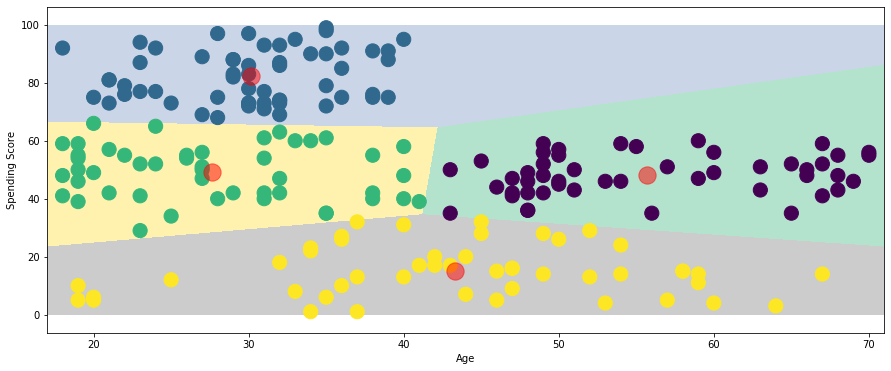

In [13]:
plt.figure(figsize=(15, 6))
plt.clf()
pred = pred.reshape(xx.shape)

plt.imshow(pred, interpolation= 'nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap= plt.cm.Pastel2, aspect= 'auto',  origin= 'lower')
plt.scatter(x = 'Age', y = 'Spending Score (1-100)', data = data, c = labels1, s = 200)
plt.scatter(x = centroids1[:, 0], y = centroids1[:, 1], s = 300, c = 'red', alpha= 0.5)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

### 2. Segmentation using Annual Income and Spending Score

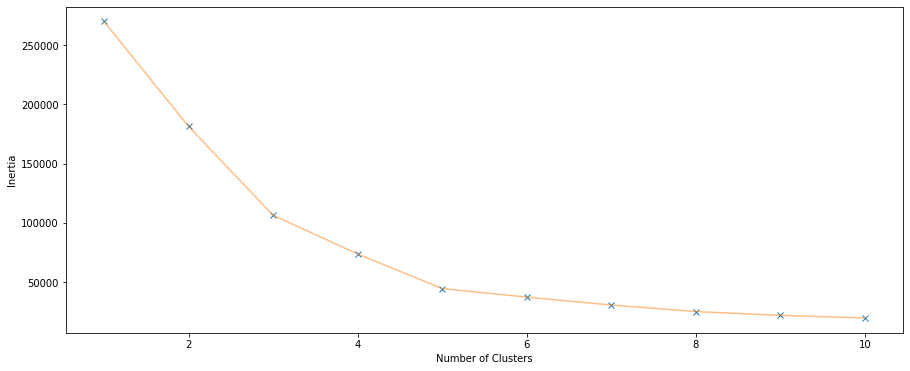

In [14]:
x = data[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values
inertia = []

for i in range(1, 11):
    al = KMeans(n_clusters= i, max_iter= 300)
    al.fit(x)
    inertia.append(al.inertia_)
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, 'x')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

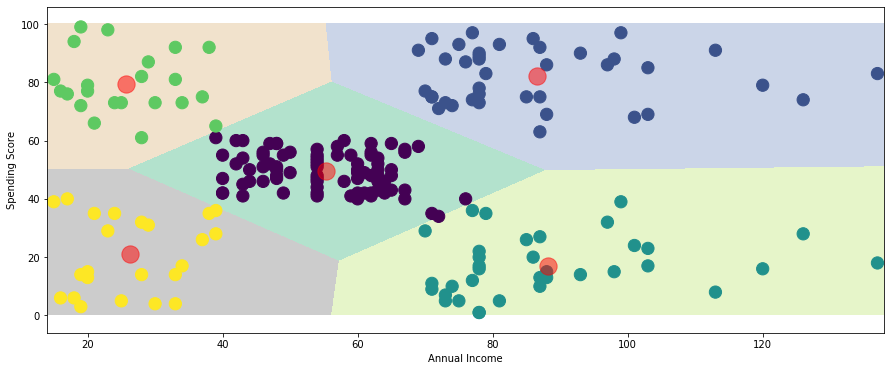

In [15]:
al = KMeans(n_clusters= 5)
al.fit(x)
labels2 = al.labels_
centroids2 = al.cluster_centers_
h = 0.02
x_min, x_max = x[:, 0].min() -1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() -1, x[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
pred = al.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(figsize=(15, 6))
pred = pred.reshape(xx.shape)
plt.imshow(pred, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Pastel2, aspect= 'auto', origin= 'lower')
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = data, c = labels2, s = 150)
plt.scatter(x = centroids2[:, 0], y = centroids2[: , 1], s = 300, c = 'red', alpha= 0.5)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### 3.Segmentation using Age , Annual Income and Spending Score

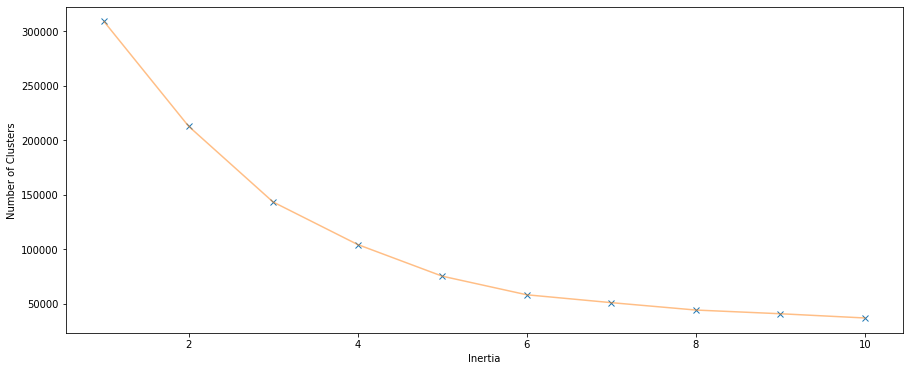

In [16]:
x = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values
inertia = []

for i in range(1, 11):
    al = KMeans(n_clusters= i)
    al.fit(x)
    inertia.append(al.inertia_)

plt.figure(figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, 'x')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Inertia')
plt.ylabel('Number of Clusters')
plt.show()

In [17]:
import plotly as py
import plotly.graph_objs as go
al = KMeans(n_clusters= 8)
al.fit(x)
labels3 = al.labels_
centroids3 = al.cluster_centers_
data['Label 3'] = labels3
trace = go.Scatter3d(
    x = data['Age'],
    y = data['Spending Score (1-100)'],
    z = data['Annual Income (k$)'],
    mode = 'markers', marker = dict(color = data['Label 3'], size = 20, line = dict(color = data['Label 3'], width = 20), opacity = 0.8)
)
dt = [trace]
layout = go.Layout(title = 'Clusters', scene = dict(
                                                    xaxis = dict(title = 'Age'),
                                                    yaxis = dict(title = 'Spending Score'),
                                                    zaxis = dict( title = 'Annual Income')))
fig = go.Figure(data = dt, layout = layout)
py.offline.iplot(fig)